## Fashion MNIST 

<p>
    <ul>
        <li>The Fashion-MNIST dataset is a collection of images commonly used in machine learning and computer vision research.</li>
        <li>It serves as an alternative to the traditional MNIST dataset, which consists of handwritten digits.</li>
        <li>The Fashion-MNIST dataset is designed to benchmark the performance of machine learning models on a broader range of image types.</li>
    </ul>
</p>

### Contents:

The dataset contains grayscale images (28x28 pixels) of 10 different fashion categories.
Each image is associated with a label indicating the category of clothing it represents.<br>Categories:- 
0: T-shirt/top&nbsp;
1: Trouser&nbsp;
2: Pullover&nbsp;
3: Dress&nbsp;
4: Coat&nbsp;
5: Sandal&nbsp;
6: Shirt&nbsp;
7: Sneaker&nbsp;
8: Bag&nbsp;
9: Ankle boot&nbsp;
</h4>

### I. Importing neccesary libraries

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

2023-11-13 19:28:36.673312: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 19:28:37.297214: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 19:28:37.298224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 19:28:44.088618: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### II. Visualisation

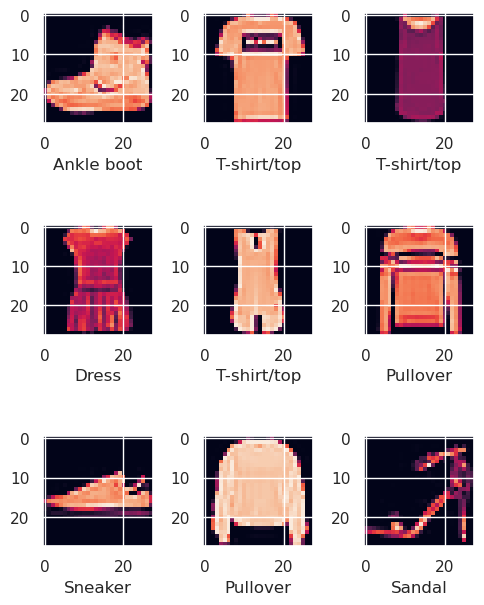

In [5]:
cnt=1
sns.set()
plt.figure(figsize=(5,7))
for i in range(9):
    plt.subplot(3,3,cnt)
    plt.imshow(train_images[i])
    plt.xlabel(labels[train_labels[i]])
    plt.tight_layout()
    cnt+=1

In [6]:
train_labels.shape

(60000,)

In [7]:
print(train_images.shape,test_images.shape,sep="\t")

(60000, 28, 28)	(10000, 28, 28)


### III. Preprocessing

An Image consists of 3 parameters (height, width, no. of channels)
Here, only two parameters are there and channel parameter is missing, which is essential while training CNN , so it needs to be reshape by adding channel parameter

In [8]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [9]:
# Scaling of Image pixels
train_images_scaled = train_images/255
test_images_scaled = test_images/255

In [10]:
print(train_images_scaled.shape,test_images_scaled.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
train_images_scaled

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

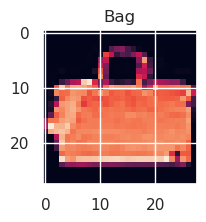

In [12]:
plt.figure(figsize=(3,2))
plt.imshow(train_images[99])
plt.title(labels[train_labels[99]])
plt.show()

### IV. Model Building & Training

In [13]:
from keras import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense

In [14]:
model = Sequential([
    
    #cnn layers
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    # dense
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(train_images_scaled,train_labels,epochs=10,validation_data=(test_images_scaled,test_labels))

Epoch 1/10


2023-11-13 19:29:12.623258: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 62s 32ms/step - loss: 0.4524 - accuracy: 0.8364 - val_loss: 0.3499 - val_accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3057 - accuracy: 0.8893 - val_loss: 0.3132 - val_accuracy: 0.8877
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2626 - accuracy: 0.9038 - val_loss: 0.2789 - val_accuracy: 0.8983
Epoch 4/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2301 - accuracy: 0.9151 - val_loss: 0.2667 - val_accuracy: 0.9010
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2060 - accuracy: 0.9249 - val_loss: 0.2553 - val_accuracy: 0.9076
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1831 - accuracy: 0.9322 - val_loss: 0.2594 - val_accuracy: 0.9059
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1649 - accuracy: 0.9377 - val_loss: 0.2635 - val_accura

### V. Model Metrics Evaluation

In [ ]:
Project 13 of #50DataScienceProjects



Thrilled to share the outcomes of my recent Image Classification project using Convolutional Neural Network (CNN), focused on the "Fashion-MNIST" dataset. 



This exploration into deep learning has been both captivating and insightful. 🧵👖👗



Key Achievements:

Training Accuracy: 95.35%

Validation Accuracy: 90.29%

Loss: 0.1218



These metrics underscore the model's proficiency in recognizing diverse fashion items and its robust generalization capabilities on unseen data. The journey involved meticulous fine-tuning, exploring various layers of convolutional neural network architecture, and deep immersion into the nuances of the Fashion-MNIST dataset. 🧠💡



Successfully Addressed Categories:

T-shirt/top ✔️

Trouser ✔️

Pullover ✔️

Dress ✔️

Coat ✔️

Sandal ✔️

Shirt ✔️

Sneaker ✔️

Bag ✔️

Ankle boot ✔️



I'm proud of creating this model and excited to explore new frontiers in deep learning.🚀✨



#machinelearning  #deeplearning #computervision #convolutionalneuralnetworks  #FashionMNIST #datascience  #neuralnetworks  #ai  #innovation  #techjourney 

In [17]:
model.evaluate(test_images_scaled,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2978 - accuracy: 0.9029


[0.2978323996067047, 0.902899980545044]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [19]:
y_pred = model.predict(test_images_scaled)

313/313 [==============================] - 3s 8ms/step


In [20]:
y_pred_labels = [np.argmax(x) for x in y_pred]

In [21]:
y_pred_labels[:5]

[9, 2, 1, 1, 6]

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
matrix = confusion_matrix(test_labels,y_pred_labels)

Text(91.25, 0.5, 'Actual value')

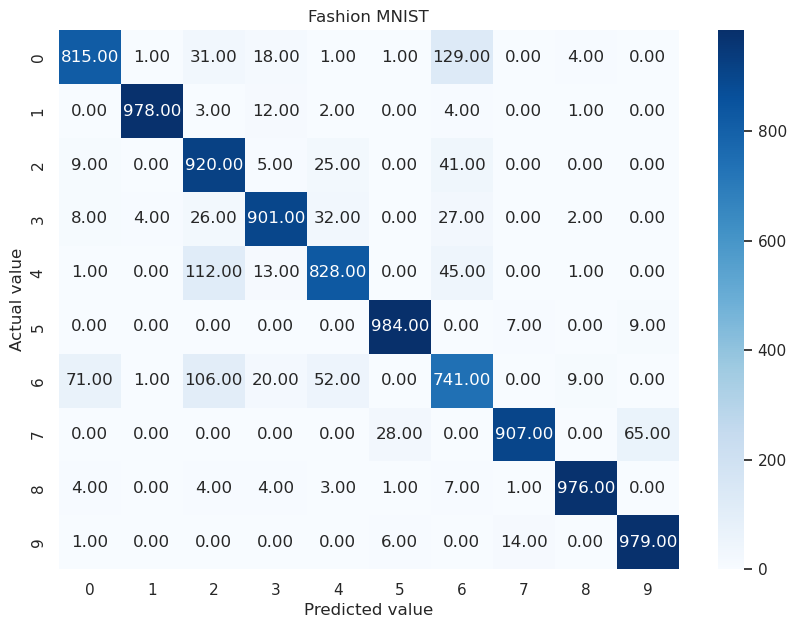

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='.2f',cmap='Blues')
plt.title('Fashion MNIST')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")

In [25]:
print(classification_report(test_labels,y_pred_labels))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.77      0.92      0.84      1000
           3       0.93      0.90      0.91      1000
           4       0.88      0.83      0.85      1000
           5       0.96      0.98      0.97      1000
           6       0.75      0.74      0.74      1000
           7       0.98      0.91      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



### VI. Building Predictive System

In [26]:
test_data = test_images_scaled[4].reshape((1,28,28,1))

In [27]:
test_data.shape

(1, 28, 28, 1)

In [28]:
pred = model.predict(test_data)

1/1 [==============================] - 0s 25ms/step


In [29]:
pred_label = np.argmax(pred)

In [30]:
pred_label

6

In [31]:
test_labels[4]

6

Text(0.5, 0, 'Shirt')

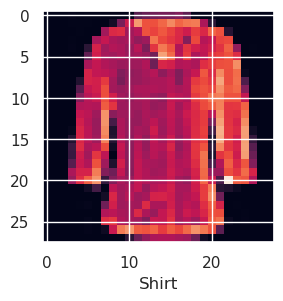

In [32]:
plt.figure(figsize=(4,3))
plt.imshow(test_data[0])
plt.xlabel(labels[pred_label])